# **CLASSIFICADOR DE INGREDIENTES**
### **cebola, creme de leite, dente de alho, frango, katchup, tomate**
## **2TDSA**
André dos Santos Menezes de Souza  
RM: 88112

Giulio Cesar Costa Bernardi   
RM: 86993

Kaike de Santana Queiroz Ferreira	
RM: 88473

Raissa Rassilan		
RM: 89011

**imports necessários**

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

**Imprimir quantidade de imagens em cada diretório**

In [2]:
dataset_dir = os.path.join(os.getcwd(), 'Data')

dataset_train_dir = os.path.join(dataset_dir, 'train')
dataset_train_cebola_len = len(os.listdir(os.path.join(dataset_train_dir, 'cebola')))
dataset_train_cremeDeLeite_len = len(os.listdir(os.path.join(dataset_train_dir, 'cremeDeLeite')))
dataset_train_denteAlho_len = len(os.listdir(os.path.join(dataset_train_dir, 'denteAlho')))
dataset_train_frango_len = len(os.listdir(os.path.join(dataset_train_dir, 'frango')))
dataset_train_katchup_len = len(os.listdir(os.path.join(dataset_train_dir, 'katchup')))
dataset_train_tomate_len = len(os.listdir(os.path.join(dataset_train_dir, 'tomate')))

dataset_validation_dir = os.path.join(dataset_dir, 'validation')
dataset_validation_cebola_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cebola')))
dataset_validation_cremeDeLeite_len = len(os.listdir(os.path.join(dataset_validation_dir, 'cremeDeLeite')))
dataset_validation_denteAlho_len = len(os.listdir(os.path.join(dataset_validation_dir, 'denteAlho')))
dataset_validation_frango_len = len(os.listdir(os.path.join(dataset_validation_dir, 'frango')))
dataset_validation_katchup_len = len(os.listdir(os.path.join(dataset_validation_dir, 'katchup')))
dataset_validation_tomate_len = len(os.listdir(os.path.join(dataset_validation_dir, 'tomate')))


print('Train cebola: %s'% dataset_train_cebola_len)
print('Train cremeDeLeite: %s'% dataset_train_cremeDeLeite_len)
print('Train denteAlho: %s'% dataset_train_denteAlho_len)
print('Train frango: %s'% dataset_train_frango_len)
print('Train katchup: %s'% dataset_train_katchup_len)
print('Train tomate: %s'% dataset_train_tomate_len)

print('Validation cebola: %s'% dataset_validation_cebola_len)
print('Validation cremeDeLeite: %s'% dataset_validation_cremeDeLeite_len)
print('Validation denteAlho: %s'% dataset_validation_denteAlho_len)
print('Validation frango: %s'% dataset_validation_frango_len)
print('Validation katchup: %s'% dataset_validation_katchup_len)
print('Validation tomate: %s'% dataset_validation_tomate_len)

Train cebola: 93
Train cremeDeLeite: 82
Train denteAlho: 144
Train frango: 102
Train katchup: 93
Train tomate: 82
Validation cebola: 9
Validation cremeDeLeite: 10
Validation denteAlho: 12
Validation frango: 9
Validation katchup: 11
Validation tomate: 12


**Definição de alguns valores**

In [3]:
image_width = 160
image_height = 160
image_color_channel = 3
image_color_channel_size = 255
image_size = (image_width, image_height)
image_shape = image_size + (image_color_channel,)

batch_size = 64
epochs = 20
learning_rate = 0.0001

class_names = ['cebola','creme-de-leite','dente-de-alho','frango','katchup','tomate']

**Cria dataset de treino**

In [4]:
dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_train_dir,
    image_size = image_size,
    batch_size = batch_size,
    shuffle = True
)

Found 585 files belonging to 6 classes.


**Cria dataset de validação**

In [5]:
dataset_validation = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_validation_dir,
    image_size = (image_width, image_height),
    batch_size = batch_size,
    shuffle = True
)

Found 60 files belonging to 6 classes.


**Cria dataset de teste e exibe cardinalidade do dataset de validação e teste**

In [6]:
dataset_validation_cardinality = tf.data.experimental.cardinality(dataset_validation)
dataset_validation_batches = dataset_validation_cardinality // 5

dataset_test = dataset_validation.take(dataset_validation_batches)
dataset_validation = dataset_validation.skip(dataset_validation_batches)

print('Validation Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_validation))
print('Test Dataset Cardinality: %d' % tf.data.experimental.cardinality(dataset_test))

Validation Dataset Cardinality: 1
Test Dataset Cardinality: 0


**Solicita que o tempo de execução tf.data ajuste o valor dinamicamente em tempo de execução com AUTOTUNE**

In [7]:
autotune = tf.data.AUTOTUNE

dataset_train = dataset_train.prefetch(buffer_size = autotune)
dataset_validation = dataset_validation.prefetch(buffer_size = autotune)
dataset_test = dataset_validation.prefetch(buffer_size = autotune)

**Cria função que exibe dataset**

In [8]:
def plot_dataset(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, labels in dataset.take(1):

        for i in range(9):

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(features[i].numpy().astype('uint8'))
            plt.title(class_names[labels[i]])

**Dataset de treino**

<Figure size 432x288 with 0 Axes>

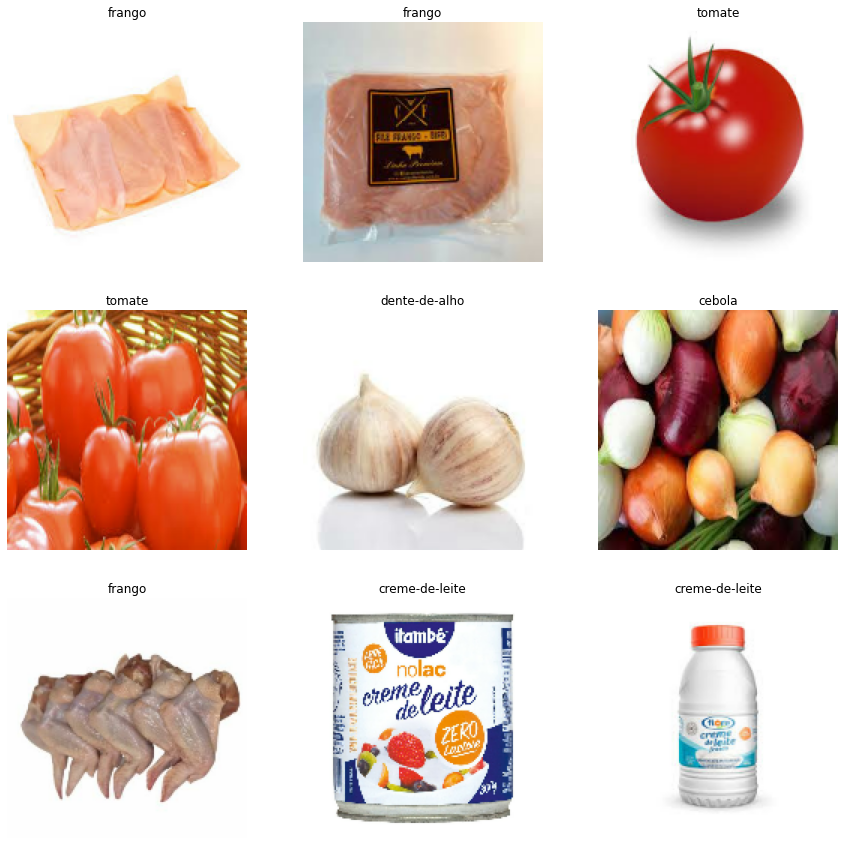

In [9]:
plot_dataset(dataset_train)

**Dataset de validação**

<Figure size 432x288 with 0 Axes>

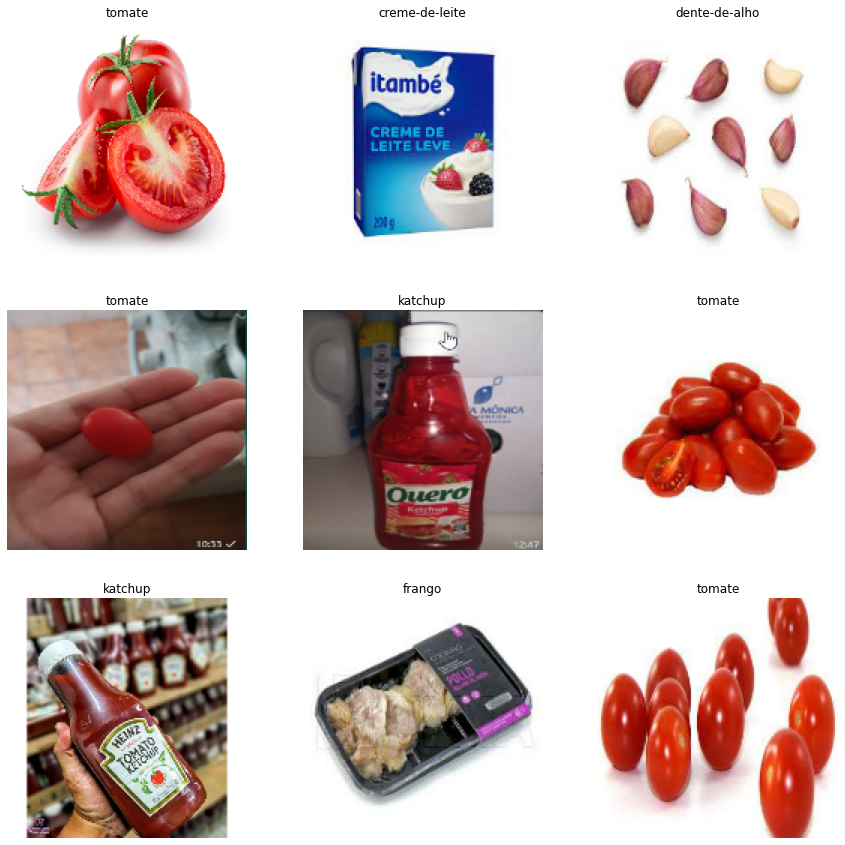

In [10]:
plot_dataset(dataset_validation)

**Dataset de teste**

<Figure size 432x288 with 0 Axes>

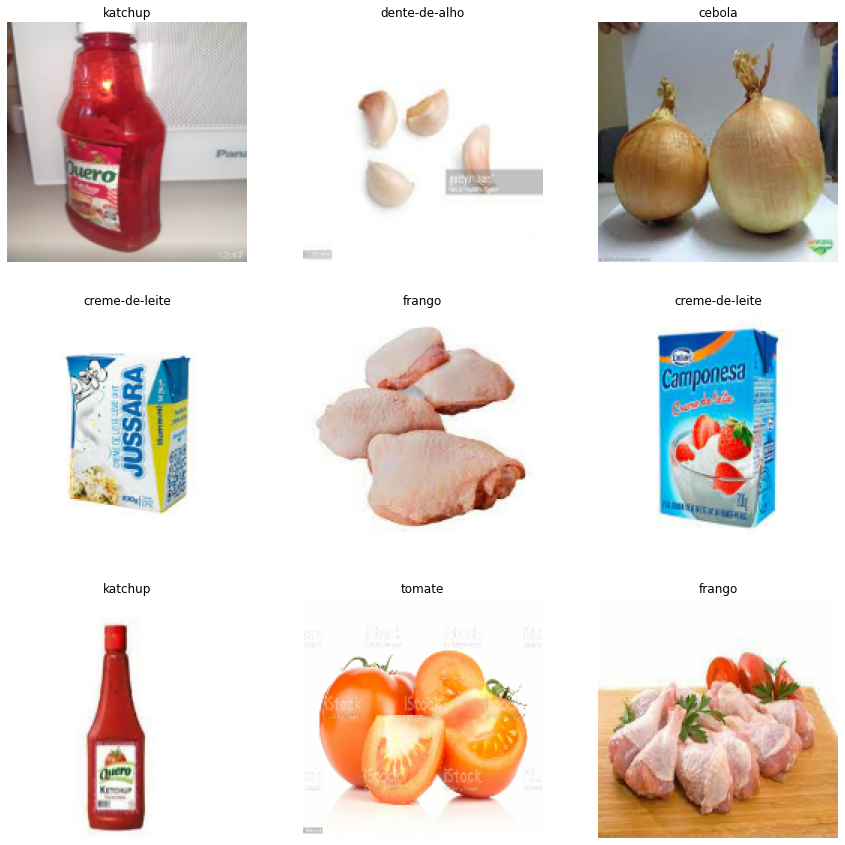

In [11]:
plot_dataset(dataset_test)

**Técnica para aumento de dados de imagem: augmentation**

In [12]:
data_augmentation = tf.keras.models.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2)
])

**Cria função que aplica augmentation ao dataset**

In [13]:
def plot_dataset_data_augmentation(dataset):

    plt.gcf().clear()
    plt.figure(figsize = (15, 15))

    for features, _ in dataset.take(1):

        feature = features[0]

        for i in range(9):

            feature_data_augmentation = data_augmentation(tf.expand_dims(feature, 0))

            plt.subplot(3, 3, i + 1)
            plt.axis('off')

            plt.imshow(feature_data_augmentation[0] / image_color_channel_size)

**Aplica função de augmentation ao dataset de treino**

<Figure size 432x288 with 0 Axes>

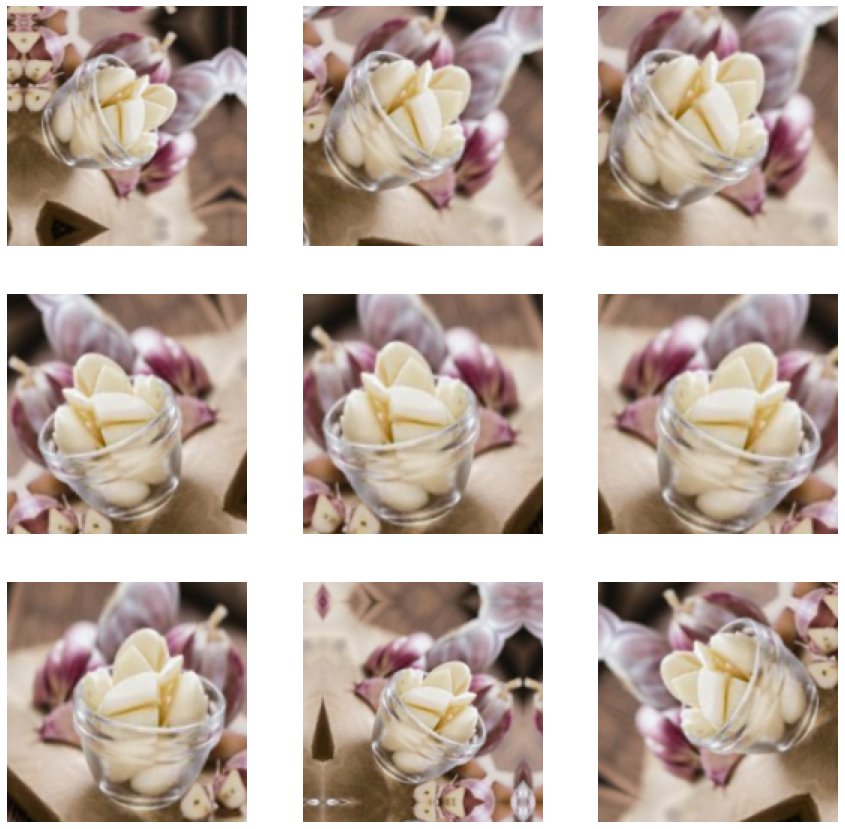

In [14]:
plot_dataset_data_augmentation(dataset_train)

**Técnica rescaling para aumento de performance**

In [15]:
rescaling = tf.keras.layers.experimental.preprocessing.Rescaling(1. / (image_color_channel_size / 2.), offset = -1, input_shape = image_shape)

**Técnica transfer learning, que faz nosso modelo ter o auxilio de outro modelo já criado**

In [16]:
model_transfer_learning = tf.keras.applications.MobileNetV2(input_shape = image_shape, include_top = False, weights = 'imagenet')
model_transfer_learning.trainable = False

model_transfer_learning.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

**Técnica para interromper o treinamento da rede neural no momento certo**

In [17]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3)

**Cria e compila a rede neural**

In [18]:
model = tf.keras.models.Sequential([
    rescaling,
    data_augmentation,
    model_transfer_learning,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1280, input_shape=(1280,), activation="relu"),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(class_names), activation = 'softmax')
])
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 160, 160, 3)       0         
                                                                 
 sequential (Sequential)     (None, 160, 160, 3)       0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1280)              1639680   
                                                                 
 dense_1 (Dense)             (None, 512)              

**Treina a rede neural**

In [19]:
history = model.fit(
    dataset_train,
    validation_data = dataset_validation,
    epochs = epochs,
    callbacks = [
        early_stopping
    ]
)

Epoch 1/20
10/10 [==============================] - 7s 464ms/step - loss: 1.4978 - accuracy: 0.5265 - val_loss: 0.5697 - val_accuracy: 0.7333
Epoch 2/20
10/10 [==============================] - 4s 406ms/step - loss: 0.4776 - accuracy: 0.8359 - val_loss: 0.2801 - val_accuracy: 0.9167
Epoch 3/20
10/10 [==============================] - 4s 407ms/step - loss: 0.3066 - accuracy: 0.8991 - val_loss: 0.2964 - val_accuracy: 0.8667
Epoch 4/20
10/10 [==============================] - 4s 420ms/step - loss: 0.2659 - accuracy: 0.9197 - val_loss: 0.2866 - val_accuracy: 0.9000
Epoch 5/20
10/10 [==============================] - 4s 421ms/step - loss: 0.1578 - accuracy: 0.9402 - val_loss: 0.2633 - val_accuracy: 0.9333
Epoch 6/20
10/10 [==============================] - 4s 417ms/step - loss: 0.1505 - accuracy: 0.9556 - val_loss: 0.2180 - val_accuracy: 0.9000
Epoch 7/20
10/10 [==============================] - 4s 422ms/step - loss: 0.1383 - accuracy: 0.9538 - val_loss: 0.1718 - val_accuracy: 0.9500
Epoch 

**Função com configuração do gráfico da perda e precisão do modelo**

In [20]:
def plot_model():

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.gcf().clear()
    plt.figure(figsize = (15, 8))

    plt.subplot(1, 2, 1)
    plt.title('Training and Validation Accuracy')
    plt.plot(epochs_range, accuracy, label = 'Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label = 'Validation Accuracy')
    plt.legend(loc = 'lower right')

    plt.subplot(1, 2, 2)
    plt.title('Training and Validation Loss')
    plt.plot(epochs_range, loss, label = 'Training Loss')
    plt.plot(epochs_range, val_loss, label = 'Validation Loss')
    plt.legend(loc = 'lower right')

    plt.show()

**Exibe o gráfico de perda e precisão do modelo**

<Figure size 432x288 with 0 Axes>

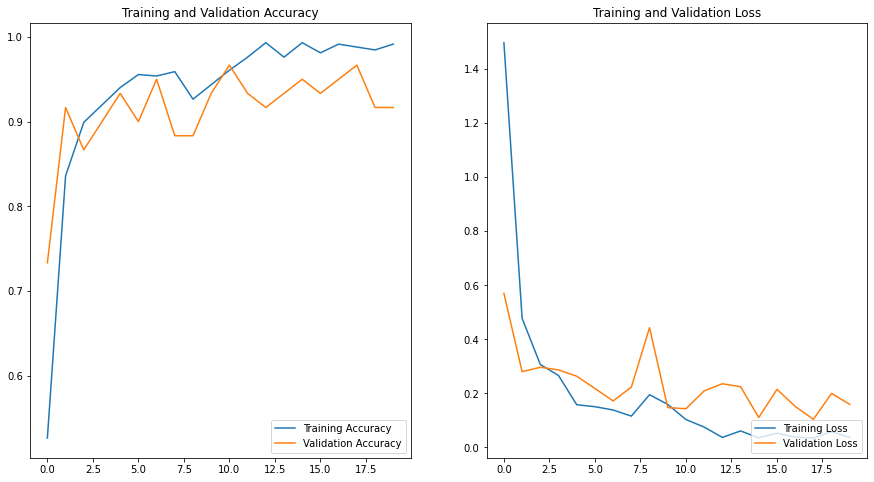

In [21]:
plot_model()

**Imprime perda e precisão do dataset de teste**

In [22]:
dataset_test_loss, dataset_test_accuracy = model.evaluate(dataset_test)

print('Dataset Test Loss:     %s' % dataset_test_loss)
print('Dataset Test Accuracy: %s' % dataset_test_accuracy)

1/1 [==============================] - 0s 368ms/step - loss: 0.1590 - accuracy: 0.9167
Dataset Test Loss:     0.1590251922607422
Dataset Test Accuracy: 0.9166666865348816


**Salva modelo**

In [23]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


**Carrega modelo**

In [24]:
model = tf.keras.models.load_model('model')

**Função que faz predição a partir de uma imagem recebida**

In [25]:
def predict(image_file):

    image = tf.keras.preprocessing.image.load_img(image_file, target_size = image_size)
    plt.imshow(image)

    image = tf.keras.preprocessing.image.img_to_array(image)
    image = tf.expand_dims(image, 0)
    
    prediction = model.predict(image)
    
    
    predicted_label = np.argmax(prediction)
        
    print("Predição: {:2.2f}% | {}".format(100*np.max(prediction), class_names[predicted_label]))

**Função que recebe uma url de imagem para fazer uma predição**

In [26]:
def predict_url(image_origin):

    image_file = tf.keras.utils.get_file(origin = image_origin)
    return predict(image_file)

**Predizendo se uma imagem é de uma cavalo ou um humano**

Predição: 99.90% | katchup


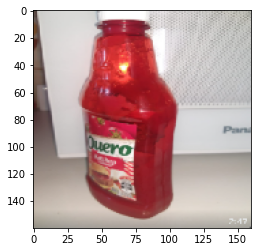

In [27]:
predict_url('https://i.imgur.com/6vOAROL.png') #<<<----------- COLOQUE SUA URL AQUI-------